# 🛳️ **Titanic Survival Prediction**  

# ***🎯 Goals & Tasks:*** 

* 1. Provide insight by means of data. 

# ***🗂️ Import Libraries*** 

In [1]:
import os

import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore') 

# ***⏳ Data Loading*** 

In [2]:
os.listdir('/kaggle/input/titanic-data')  
df = pd.read_csv('/kaggle/input/titanic-data/train.csv') 

# ***🔭 Data Cleaning & Exploration***  

### 1. 🔍 **Take a Glimpse of Data**

In [3]:
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2. 🔍 **DataType of Each Column**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. 🔍 **Shape of the DataFrame**

In [6]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')  

Rows: 891
Columns: 12


### 4. 🔍 **Descriptive Statistics**

In [7]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5. 🔍 **Missing Values**

In [8]:
df.isnull().sum().sort_values(ascending = False) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
(df.isnull().sum() / len(df)).sort_values(ascending = False) 

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

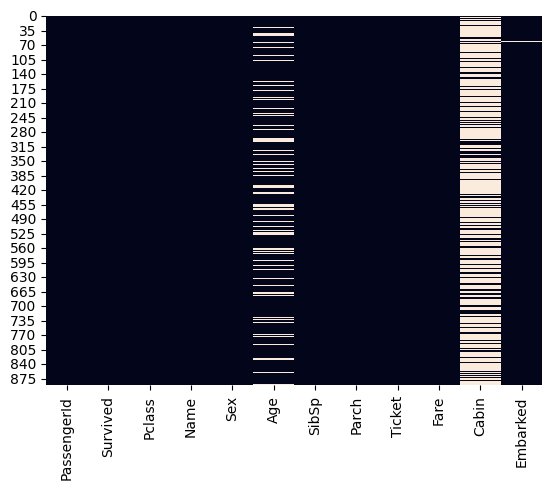

In [10]:
sns.heatmap(df.isnull(), cbar = False)
plt.show() 

#  📰 ***Conclusion Set 1***

1. The columns have float datatypes are 2, integer datatype 5, object datatype are 5

2. There are 891 rows and 12 columns in the dataset.

# ***📽️ Data Visualization*** 

### 1. 🔍 **Survivial Rate Distribution**

Text(0.5, 1.0, 'Distribution of Survival Rates')

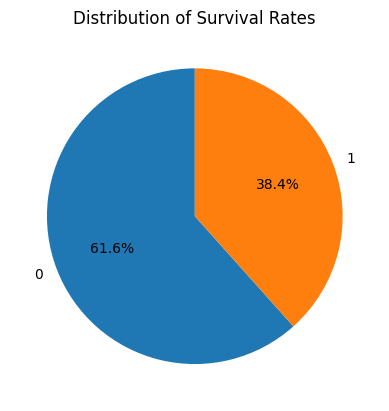

In [11]:
df['Survived'].value_counts().plot(kind='pie',
                                   startangle= 90, 
                                   autopct = '%1.1f%%') 

plt.ylabel('')
plt.title('Distribution of Survival Rates')

### 2. 🔍 **Create a subplot that displays the count of survivors categorized by gender & port of embarkation & Pclass**

In [12]:
cate_cols = ['Sex', 'Embarked', 'Pclass'] 
target = 'Survived' 

In [13]:
fig = plt.figure(figsize = (25, len(cate_cols)*6))  

<Figure size 2500x1800 with 0 Axes>

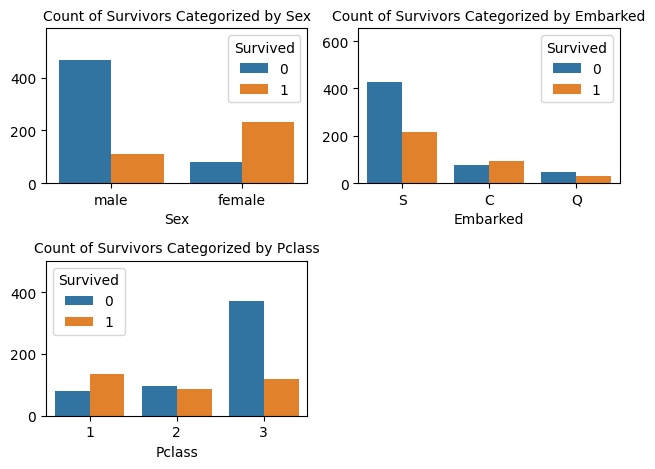

In [14]:
for i, col in enumerate(cate_cols):
    plt.subplot(len(cate_cols)//2 + len(cate_cols)%2, 2, i+1) 
    sns.countplot(x=col, hue=target, data=df) 
    plt.title(f'Count of Survivors Categorized by {col}', fontsize=10) 
    plt.ylim(0, df[col].value_counts().max()+10)
    plt.ylabel('')


plt.tight_layout() 
plt.show() 


### 3. 🔍 **Create a histplot that displays the count of survivors categorized by Age**

<Axes: xlabel='Age', ylabel='Count'>

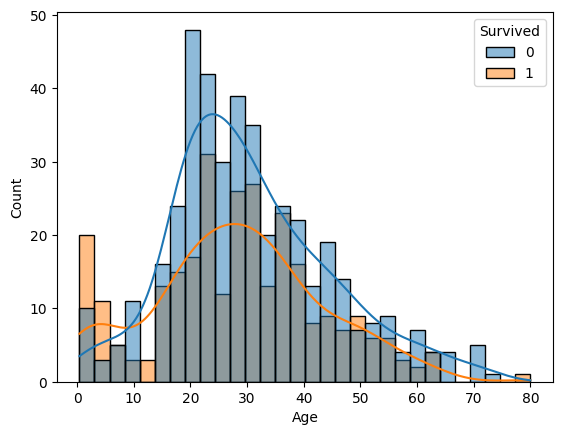

In [15]:
sns.histplot(data=df,
             x='Age', 
             hue='Survived', 
             bins=30,
             kde=True) 